In [18]:
import socceraction.xthreat as xthreat
import matplotsoccer as mps
import socceraction.spadl.config as spadlconfig
import numpy as np
from scipy.interpolate import RectBivariateSpline
from mplsoccer import Pitch


In [2]:
file_path = r"C:\Users\jda\Desktop\Speciale\xtmodelv2.pkl"
xTModel = xthreat.load_model(file_path)

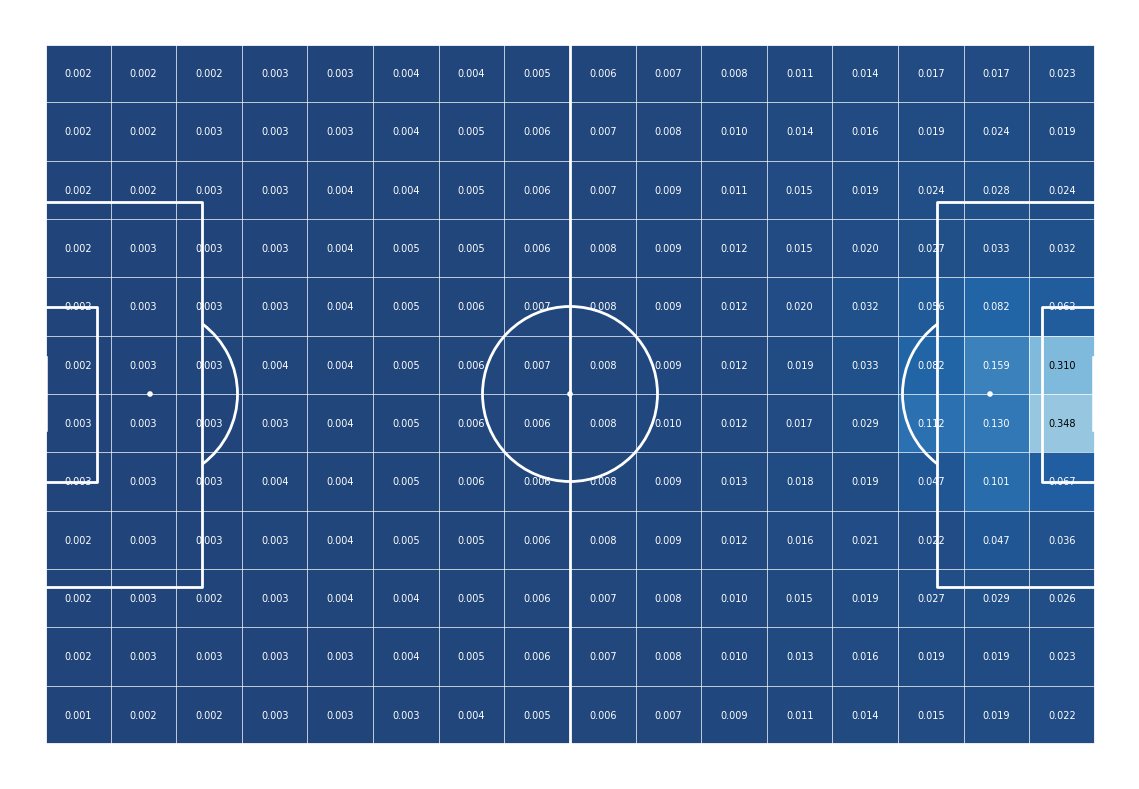

In [69]:
from mplsoccer import Pitch
import numpy as np
from socceraction.xthreat import load_model
from matplotlib.colors import Normalize

# Load the xT model
file_path = r"C:\Users\jda\Desktop\Speciale\xtmodelv2.pkl"
xTModel = load_model(file_path)
xT = np.array(xTModel.xT)  # shape: (12, 16)

# Create a pitch with a larger figure size
pitch = Pitch(line_color='white', pitch_color='white')
fig, ax = pitch.draw(figsize=(12, 8))  # Adjust figure size for a bigger map

# Normalize the colormap to adjust the scale
norm = Normalize(vmin=0.001, vmax=0.6)  # Adjust vmax to control the upper limit of the scale

# Draw heatmap using ax.imshow with the 'Blues' colormap and normalization
heatmap = ax.imshow(
    xT,
    extent=(0, pitch.dim.pitch_length, 0, pitch.dim.pitch_width),
    origin='lower',
    cmap='Blues_r',  # Use tahe 'Blues' colormap
    norm=norm,     # Apply normalization
    alpha=0.9
)

# Add grid lines manually
rows, cols = xT.shape
cell_length = pitch.dim.pitch_length / cols
cell_width = pitch.dim.pitch_width / rows

# Draw vertical lines
for j in range(1, cols):
    ax.vlines(j * cell_length, 0, pitch.dim.pitch_width, color='white', linewidth=0.5)

# Draw horizontal lines
for i in range(1, rows):
    ax.hlines(i * cell_width, 0, pitch.dim.pitch_length, color='white', linewidth=0.5)

# Annotate each cell with its value
for i in range(rows):
    for j in range(cols):
        val = xT[i, j]
        x = cell_length * (j + 0.5)
        y = cell_width * (i + 0.5)
        # Change text color based on value for better visibility
        text_color = 'white' if val < 0.5 * xT.max() else 'black'
        ax.text(x, y, f"{val:.3f}", ha='center', va='center', color=text_color, fontsize=7)

